In [1]:
import glob
import venn
from scipy.cluster.hierarchy import dendrogram, linkage
from neupy import algorithms
from scipy.stats.stats import pearsonr   
from scipy.interpolate import interp1d
import itertools as it
import statsmodels.stats.multitest as multi
import Colors
from matplotlib.patches import Rectangle, Circle

In [2]:
def zscore(df):
    df = df.loc[df.index[df.sum(axis=1)>0]]
    zdf = df.T
    zdf = (zdf-zdf.mean())/zdf.std()
    zdf = zdf.T
    return zdf

def scalezscore(zdf):
    df  = ((zdf.T>=0)*zdf.T/zdf.max(axis=1) + (zdf.T<0)*zdf.T/abs(zdf.min(axis=1))).T
    return df

# read Lfng tomo data

In [3]:
glob.glob('../*normfilt*')

['../mG01_E08_5dAA_lngf.normfilt.coutt.tsv.gz',
 '../mG02_F08_5dAA_lngf.normfilt.coutt.tsv.gz',
 '../mG03_B10_5dAA_lngf.normfilt.coutt.tsv.gz']

In [4]:
ndfs_L = [read_csv(f, sep = '\t', index_col=0) for f in glob.glob('../*normfilt*')]

In [5]:
for df in ndfs_L:
    df.index = ['_'.join(idx.rsplit('_')[:2]) for idx in df.index]

In [7]:
zdfs_L = [zscore(df) for df in ndfs_L]

In [8]:
gene_corr_L = read_csv('../results/lfngMouseGastruloids/geneCorrelations_5dAA.tsv', sep = '\t', index_col=0)

In [9]:
gene_corr_L.index = ['_'.join(idx.rsplit('_')[:2]) for idx in gene_corr_L.index]

In [10]:
pvcols = [c for c in gene_corr_L.columns if 'pv_('==c[:4]]
pvth = 0.1; nth = 3
genelist_L = gene_corr_L.index[gene_corr_L.apply(lambda x: sum(x[pvcols]<pvth), axis = 1) >= nth]

In [11]:
len(genelist_L), len(gene_corr_L)

(1456, 25828)

# read E14IB10 data

In [18]:
glob.glob('../../E14-mGstl-tomo/mG0*.filtnorm.coutt.tsv*')

['../../E14-mGstl-tomo/mG01.filtnorm.coutt.tsv.gz',
 '../../E14-mGstl-tomo/mG02.filtnorm.coutt.tsv.gz',
 '../../E14-mGstl-tomo/mG03.filtnorm.coutt.tsv.gz',
 '../../E14-mGstl-tomo/mG04.filtnorm.coutt.tsv.gz',
 '../../E14-mGstl-tomo/mG05.filtnorm.coutt.tsv.gz']

In [19]:
ndfs_E = [read_csv(f, sep = '\t', index_col=0) for f in glob.glob('../../E14-mGstl-tomo/mG0*.filtnorm.coutt.tsv*')]

In [22]:
for df in ndfs_E:
    df.index = ['_'.join(idx.rsplit('_')[:2]) for idx in df.index]

In [23]:
for df in ndfs_E:
    print((df.sum(axis=1)==0).sum())
    df = df.loc[df.index[df.sum(axis=1)>0]]

0
0
0
0
0


In [24]:
zdfs_E = [zscore(df) for df in ndfs_E]

In [25]:
[df.shape for df in ndfs_E]

[(17091, 15), (17091, 14), (17091, 14), (17091, 62), (17091, 63)]

In [26]:
#file = '/Users/anna/Dropbox/gastruloids/data/mGstl-tomo/results_postRevJan19/geneCorrelations_5dAA.tsv'
file = '../../E14-mGstl-tomo/results_postRevJan19/geneCorrelations_5dAA.tsv'
gene_corr_E = read_csv(file, sep = '\t', index_col=0)

In [27]:
gene_corr_E.index = ['_'.join(idx.rsplit('_')[:2]) for idx in gene_corr_E.index]

In [28]:
gene_corr_E.head()

,"corr_(0, 1)","pv_(0, 1)","adj-pv_(0, 1)","corr_(0, 2)","pv_(0, 2)","adj-pv_(0, 2)","corr_(0, 3)","pv_(0, 3)","adj-pv_(0, 3)","corr_(0, 4)",...,"adj-pv_(1, 4)","corr_(2, 3)","pv_(2, 3)","adj-pv_(2, 3)","corr_(2, 4)","pv_(2, 4)","adj-pv_(2, 4)","corr_(3, 4)","pv_(3, 4)","adj-pv_(3, 4)"
ENSMUSG00000000001_Gnai3,0.108611,0.359972,0.799886,-0.409809,0.936687,0.986075,-0.362883,0.909882,0.987603,-0.247878,...,0.956262,0.010513,0.487998,0.976052,0.516916,0.031506,0.322633,0.001357,0.501400,0.983297
ENSMUSG00000000028_Cdc45,-0.310235,0.875075,0.960766,0.156454,0.284957,0.798598,-0.447652,0.952290,0.997602,-0.215572,...,0.829490,-0.224320,0.784857,0.979266,-0.545152,0.976695,0.996928,0.009575,0.475995,0.974456
ENSMUSG00000000031_H19,0.168878,0.280756,0.721239,-0.172194,0.725245,0.945054,-0.033785,0.554411,0.955349,0.550434,...,0.829490,0.960320,0.000000,0.000000,0.305910,0.144729,0.637516,0.515512,0.000000,0.000000
ENSMUSG00000000037_Scml2,0.513864,0.027305,0.250767,0.336358,0.112523,0.531690,-0.190042,0.753051,0.955630,-0.406896,...,0.950081,-0.089681,0.626625,0.978737,-0.103671,0.633827,0.940262,0.045418,0.361372,0.888408
ENSMUSG00000000056_Narf,0.587155,0.012302,0.164138,0.562611,0.015303,0.179756,-0.545720,0.981496,1.000000,0.490935,...,0.956262,-0.652931,0.994899,1.000000,0.075714,0.390778,0.921212,-0.029765,0.597019,1.000000


In [29]:
pvcols = [c for c in gene_corr_E.columns if 'pv_('==c[:4]]
pvth = 0.1; nth = 5
genelist_E = gene_corr_E.index[gene_corr_E.apply(lambda x: sum(x[pvcols]<pvth), axis = 1) >= nth]

In [30]:
len(genelist_E), len(gene_corr_E)

(1199, 17091)

# gene set comparisons

/Users/anna/anaconda/envs/py36/lib/python3.6/site-packages/venn/_backwards_compatibility.py:17: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  "use `generate_petal_labels()` or the higher level `venn()` instead"
/Users/anna/anaconda/envs/py36/lib/python3.6/site-packages/venn/_backwards_compatibility.py:32: UserWarning: `venn2()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"


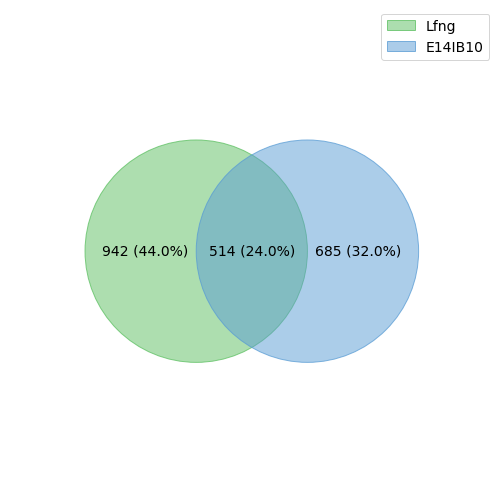

In [31]:
labels = venn.get_labels([set(genelist_L),
                          set(genelist_E)], 
                         fill=['number','percent'])

for k in labels:
    if labels[k][0:1]=='0': 
        labels[k] = ''
        
fig, ax = venn.venn2(labels, names=['Lfng', 'E14IB10'])
#plt.savefig('../results/comparison_Lfng_E14IB10_gastruloids/venn_genesPval01.pdf', bbox_inches = 'tight')
plt.show()

# clustering

In [32]:
def SOMclustering(df, gridheight = 10, gridwidth = 10, seed = 54321):
    np.random.seed = seed
    GRID_HEIGHT = gridheight
    GRID_WIDTH = gridwidth
    somfun = algorithms.SOFM(
            n_inputs=len(df.columns),
            features_grid=(GRID_HEIGHT, GRID_WIDTH),
            learning_radius=4,
            reduce_radius_after=50,
            step=0.5,
            std=1,
            shuffle_data=True,
            verbose=False)
    somfun.train(np.array(df), epochs = 300)
    clustersr = somfun.predict(np.array(df)).argmax(axis=1)
    cl_genelist_df = pd.Series(clustersr, index = df.index)
    return cl_genelist_df

def hierarchicalClustering(df, cth = 100, plot = False, method = 'ward', metric = 'euclidean', nolabels = 'True'):
    Z = linkage(df, method=method, metric = metric)
    dg = dendrogram(Z, no_labels=nolabels, color_threshold=cth, no_plot = np.invert(plot))
    plt.show()
    return Z, dg

def getClusterByColor(dg, labels):
    kk = []
    ii = 0
    cluster = 0
    color = dg['color_list'][0]
    clusters = {cluster: []}
    for i in range(len(dg['icoord'])):
        v = dg['icoord'][i]
        for j in [0,2]:
            vj = int(round((v[j]-5.)/10))
            if (v[j]-5.)/10 == vj and vj not in kk:
                kk.append(vj)
                if dg['color_list'][i] == color:
                    clusters[cluster].append(labels[dg['leaves'][vj]])
                else:
                    color = dg['color_list'][i]
                    cluster += 1
                    clusters[cluster] = [labels[dg['leaves'][vj]]]
    return clusters

def comboCluster(df, genes, gridheight = 10, gridwidth = 10, cth = 100, plot = True, method = 'ward', metric = 'euclidean', seed = 12345, nolabels = 'True'):
    somcl = SOMclustering(df.loc[genes], gridheight = gridheight, gridwidth = gridwidth, seed = seed)
    mdf_som = pd.DataFrame({i: df.loc[somcl[somcl==i].index].mean() for i in set(somcl) })
    Z, dg = hierarchicalClustering(mdf_som.T, cth = cth, plot = plot, method = method, metric = metric, nolabels = nolabels)
    if plot:
        plt.show()
    ghcl = getClusterByColor(dg, list(mdf_som.columns))
    cl_df = pd.DataFrame(somcl, columns = ['som'])
    cl_df['hcl'] = [k for s in cl_df['som'] for k in ghcl.keys() if s in ghcl[k]]
    return cl_df

In [33]:
def mergeDfs(dfs):
    mdf = dfs[0]
    for i in range(1, len(dfs)):
        mdf = mdf.merge(dfs[i], how = 'outer', left_index = True, right_index = True)
    mdf = mdf.fillna(0)
    mdf = mdf.loc[mdf.sum(axis=1).sort_values(ascending=False).index]
    return mdf

In [34]:
for df in ndfs_E:
    df.columns = [c + '-E' for c in df.columns]

for df in ndfs_L:
    df.columns = [c + '-L' for c in df.columns]

for df in zdfs_E:
    df.columns = [c + '-E' for c in df.columns]

for df in zdfs_L:
    df.columns = [c + '-L' for c in df.columns]

In [35]:
mndf_E = mergeDfs(ndfs_E)
mndf_L = mergeDfs(ndfs_L)
mndf = mergeDfs(ndfs_E + ndfs_L)

In [36]:
mzdf_E = mergeDfs(zdfs_E)
mzdf_L = mergeDfs(zdfs_L)
mzdf = mergeDfs(zdfs_E + zdfs_L)

# Only L genes

In [52]:
len(genelist_L)

1461

In [53]:
genelist_excl_L = [g for g in genelist_L if g not in genelist_E]

In [54]:
len(genelist_excl_L)

946

In [55]:
for df in ndfs_L:
    print(len([g for g in genelist_excl_L if g in df.index and df.loc[g].sum()>0]))

946
946
946


In [56]:
for df in ndfs_E:
    print(len([g for g in genelist_excl_L if g in df.index and df.loc[g].sum()>0]))

869
869
869
869
869


In [57]:
cnt = Counter()
for df in ndfs_E:
    cnt.update([g for g in genelist_excl_L if g not in df.index or df.loc[g].sum()==0])
cnt

Counter({'ENSMUSG00000006411_Nectin4': 5,
         'ENSMUSG00000021367_Edn1': 5,
         'ENSMUSG00000021478_Drd1': 5,
         'ENSMUSG00000025013_Tll2': 5,
         'ENSMUSG00000025597_Klhl4': 5,
         'ENSMUSG00000026141_Col19a1': 5,
         'ENSMUSG00000027022_Xirp2': 5,
         'ENSMUSG00000027435_Cd93': 5,
         'ENSMUSG00000028362_Tnfsf8': 5,
         'ENSMUSG00000028841_Cnksr1': 5,
         'ENSMUSG00000029700_Slc13a1': 5,
         'ENSMUSG00000031391_L1cam': 5,
         'ENSMUSG00000034098_Fstl5': 5,
         'ENSMUSG00000036510_Cdh8': 5,
         'ENSMUSG00000038903_Ccdc68': 5,
         'ENSMUSG00000039934_Gsap': 5,
         'ENSMUSG00000039956_Mrap': 5,
         'ENSMUSG00000044649_Krtap4-2': 5,
         'ENSMUSG00000045111_Taar6': 5,
         'ENSMUSG00000045776_Lrtm1': 5,
         'ENSMUSG00000046470_Sox18': 5,
         'ENSMUSG00000048391_Olfr843': 5,
         'ENSMUSG00000051041_Olfml1': 5,
         'ENSMUSG00000052613_Pcdh15': 5,
         'ENSMUSG00000054556_Gm

In [58]:
len(cnt), 5*np.sqrt(len(cnt))

(77, 43.874821936960615)

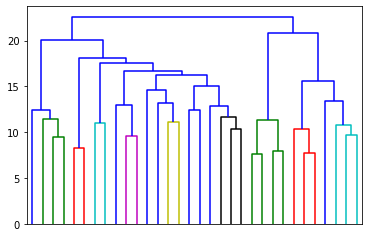

In [59]:
somhcl_LnotE_df = comboCluster(mzdf_L, cnt.keys(), cth=12, gridheight=6, gridwidth=6)

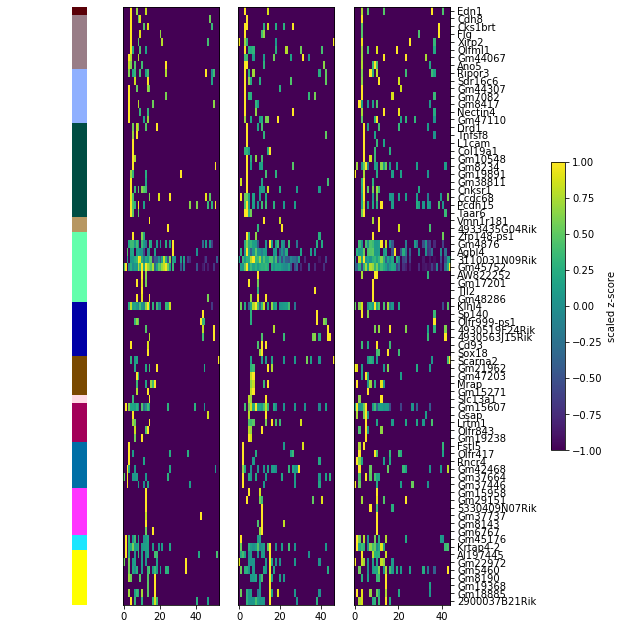

In [88]:
plt.figure(figsize=(10,11))

hcldf = somhcl_LnotE_df
gene_order = hcldf.sort_values(by=['hcl','som']).index
Npl = len(zdfs_L)+2
plt.subplot(1,Npl,1, frameon = False)

y0 = 0; z0 = 0; xb = 4 # 3
for i in set(hcldf['hcl']):
    y = 1.0*len(hcldf[hcldf['hcl'] == i])/len(hcldf)
    plt.bar([xb], [y], bottom = y0, width = 0.3, color = Colors.colors[i])
    y0 += y       
plt.yticks([]); plt.xticks([])
plt.ylim(0,1)
plt.xlim(2.5,4.5)

for i, df in enumerate(zdfs_L):
    plt.subplot(1,Npl,i+2)
    plt.imshow(scalezscore(df.loc[gene_order][::-1]), aspect = 'auto')
    plt.yticks([])
plt.tick_params(axis='y', labelleft=False, labelright=True, length = 4, left = False, right = True)
plt.yticks(range(len(gene_order)), [g.rsplit('_')[-1] for i, g in enumerate(gene_order)])


plt.subplot(1,Npl, Npl, frameon = False)
plt.xticks([]); plt.yticks([])
plt.colorbar(label = 'scaled z-score')

plt.savefig('../results/comparison_Lfng_E14IB10_gastruloids/heatmap_reprLgenes_notE.pdf', bbox_inches = 'tight')
hcldf.sort_values(by=['hcl','som']).to_csv('../results/comparison_Lfng_E14IB10_gastruloids/heatmap_reprLgenes_notE.tsv', sep = '\t')

plt.show()

In [61]:
pwd

'/Users/anna/Dropbox/gastruloids/data/Lnfg-mGst-tomo/notebooks'

In [62]:
genelist_excl_L_clean = [g for g in genelist_excl_L if g not in cnt.keys()]

In [63]:
len(genelist_excl_L_clean)

869

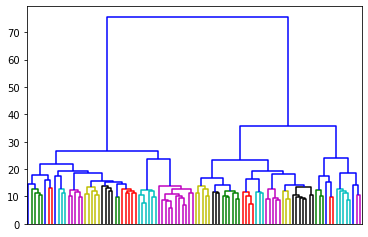

In [64]:
somhcl_L_df = comboCluster(mzdf, genelist_excl_L_clean, cth=14)

In [65]:
gene_order = somhcl_L_df.sort_values(by=['hcl','som']).index
for j in range(100):
    if 'Mef2c' in [g.rsplit('_')[1] if np.mod(i,20)==j else '' for i, g in enumerate(gene_order[::-1])]:
        print(j)
        jidx = j

0


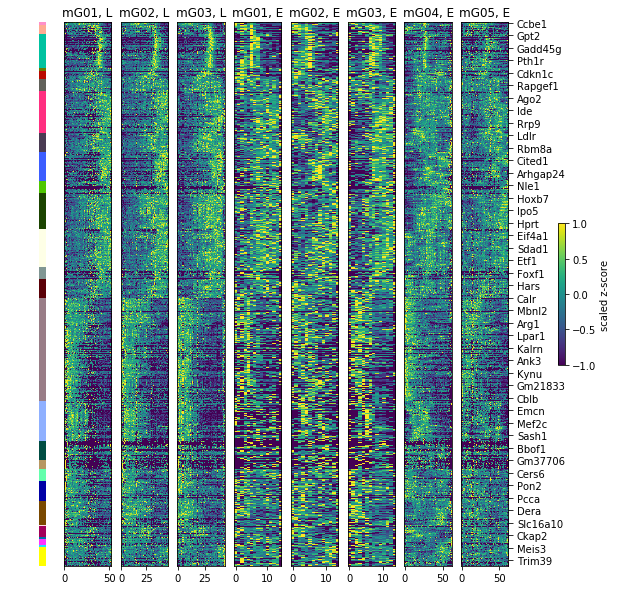

In [66]:
plt.figure(figsize=(10,10))

hcldf = somhcl_L_df
gene_order = hcldf.sort_values(by=['hcl','som']).index
Npl = len(ndfs_E + ndfs_L)+2
plt.subplot(1,Npl,1, frameon = False)

y0 = 0; z0 = 0; xb = 4 # 3
for i in set(hcldf['hcl']):
    y = 1.0*len(hcldf[hcldf['hcl'] == i])/len(hcldf)
    plt.bar([xb], [y], bottom = y0, width = 0.3, color = Colors.colors[i])
    y0 += y       
plt.yticks([]); plt.xticks([])
plt.ylim(0,1)
plt.xlim(2.5,4.5)

for i, df in enumerate(zdfs_L+zdfs_E):
    plt.subplot(1,Npl,i+2)
    plt.imshow(scalezscore(df.loc[gene_order][::-1]), aspect = 'auto')
    plt.yticks([])
    plt.title(', '.join(df.columns[0].rsplit('-')[1:]))
plt.tick_params(axis='y', labelleft=False, labelright=True, length = 5, left = False, right = True)
#plt.yticks(range(len(gene_order)), [g.rsplit('_')[1] if np.mod(i,20)==jidx else '' for i, g in enumerate(gene_order[::-1])])
plt.yticks([i for i, g in enumerate(gene_order[::-1]) if np.mod(i,20)==jidx], [g.rsplit('_')[1] for i, g in enumerate(gene_order[::-1]) if np.mod(i,20)==jidx])

plt.subplot(1,Npl, Npl, frameon = False)
plt.xticks([]); plt.yticks([])
plt.colorbar(label = 'scaled z-score')

plt.savefig('../results/comparison_Lfng_E14IB10_gastruloids/heatmap_reprLgenes_noreprE.pdf', bbox_inches = 'tight')
hcldf.sort_values(by=['hcl','som']).to_csv('../results/comparison_Lfng_E14IB10_gastruloids/heatmap_reprLgenes_noreprE.tsv', sep = '\t')

plt.show()

# Only E genes

In [67]:
len(genelist_E)

1199

In [68]:
genelist_excl_E = [g for g in genelist_E if g not in genelist_L]
len(genelist_excl_E)

684

In [69]:
for df in ndfs_L:
    print(len([g for g in genelist_excl_E if g in df.index and df.loc[g].sum()>0]))

684
684
684


In [70]:
for df in ndfs_E:
    print(len([g for g in genelist_excl_E if g in df.index and df.loc[g].sum()>0]))

684
684
684
684
684


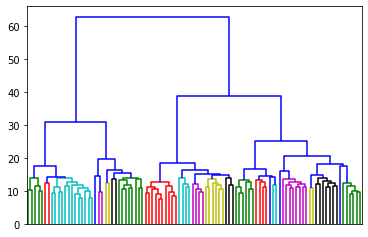

In [71]:
somhcl_E_df = comboCluster(mzdf, genelist_excl_E, cth=14)

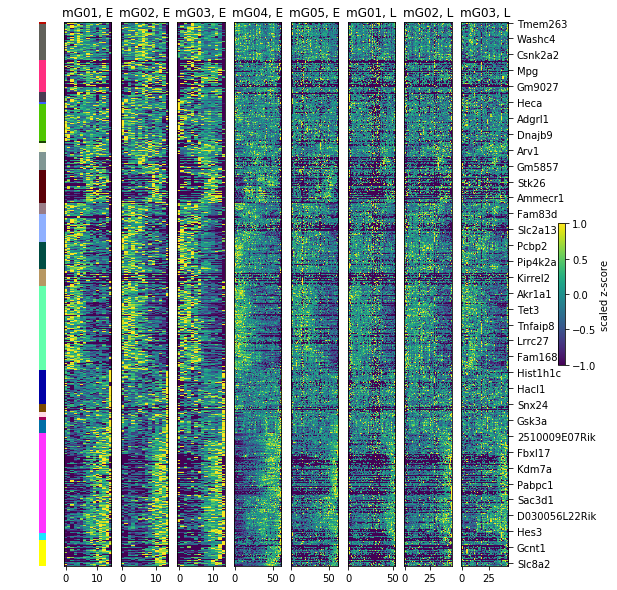

In [72]:
plt.figure(figsize=(10,10))

hcldf = somhcl_E_df
gene_order = hcldf.sort_values(by=['hcl','som']).index
Npl = len(ndfs_E + ndfs_L)+2
plt.subplot(1,Npl,1, frameon = False)

y0 = 0; z0 = 0; xb = 4 # 3
for i in set(hcldf['hcl']):
    y = 1.0*len(hcldf[hcldf['hcl'] == i])/len(hcldf)
    plt.bar([xb], [y], bottom = y0, width = 0.3, color = Colors.colors[i])
    y0 += y       
plt.yticks([]); plt.xticks([])
plt.ylim(0,1)
plt.xlim(2.5,4.5)

for i, df in enumerate(zdfs_E+zdfs_L):
    plt.subplot(1,Npl,i+2)
    plt.imshow(scalezscore(df.loc[gene_order][::-1]), aspect = 'auto')
    plt.yticks([])
    plt.title(', '.join(df.columns[0].rsplit('-')[1:]))
plt.tick_params(axis='y', labelleft=False, labelright=True, length = +5, right = True, left = False)
#plt.yticks(range(len(gene_order)), [g.rsplit('_')[1] if np.mod(i,20)==jidx else '' for i, g in enumerate(gene_order[::-1])])
plt.yticks([i for i, g in enumerate(gene_order[::-1]) if np.mod(i,20)==jidx], [g.rsplit('_')[1] for i, g in enumerate(gene_order[::-1]) if np.mod(i,20)==jidx])

plt.subplot(1,Npl, Npl, frameon = False)
plt.xticks([]); plt.yticks([])
plt.colorbar(label = 'scaled z-score')

plt.savefig('../results/comparison_Lfng_E14IB10_gastruloids/heatmap_reprEgenes_noreprL.pdf', bbox_inches = 'tight')
hcldf.sort_values(by=['hcl','som']).to_csv('../results/comparison_Lfng_E14IB10_gastruloids/heatmap_reprEgenes_noreprL.tsv', sep = '\t')

plt.show()

# Genes reproducible in both

In [73]:
genelist_combined = list(set(list(genelist_E) + list(genelist_L)))

', '.join(sorted([g.rsplit('_')[-1] for g in genelist_combined if g in genelist_E and g in genelist_L]))

'2010111I01Rik, 2610528A11Rik, 2700033N17Rik, 5930412G12Rik, 6430573F11Rik, AW551984, Aars, Abca1, Abr, Acot7, Acta2, Actn1, Adam10, Adam19, Add3, Aff3, Ajap1, Aldh1a2, App, Arhgap28, Arhgap31, Arhgef26, Arid3b, Armcx2, Atf7ip, Atp1a2, Axin2, B230323A14Rik, B3gnt7, Banf1, Bbs9, Bex1, Bmi1, Bmp3, Boc, Btg2, Calcoco1, Camk2a, Camsap3, Car14, Cask, Ccdc88c, Ccnd1, Ccnd2, Ccng2, Cd248, Cd36, Cdc14b, Cdc34, Cdh11, Cdk18, Cdk6, Cdkn1a, Cdon, Cdx1, Cdx2, Cdx4, Celsr1, Cenpw, Cep85l, Chd3, Chic1, Ckap4, Clmp, Cnksr3, Cnn2, Col12a1, Col1a2, Col23a1, Col26a1, Col2a1, Col4a1, Col4a2, Copg2, Cox7a2, Cpne2, Cpne8, Crabp1, Csrp2, Ctla2a, Ctps, Cttnbp2, Ctxn1, Cxcl12, Cxxc5, Cystm1, D030007L05Rik, Dab2, Dact1, Dchs1, Dclk2, Ddah2, Ddx21, Depdc7, Dhcr24, Dlk1, Dll1, Dll3, Dmd, Dmrt2, Dnmt3a, Dock5, Dynll2, Ebf1, Ebf2, Edn3, Ednra, Efna1, Efna3, Efnb1, Eif5a, Elavl4, Elk3, Emilin1, Enah, Enc1, Eno3, Eogt, Epha5, Epha7, Ephb2, Ephb3, Erg28, Errfi1, Ets1, Ets2, Etv4, Etv5, Eva1b, Evx1, Evx1os, Eya1, Eya2

In [74]:
genelist_restricted = [g for g in genelist_combined if g in genelist_E and g in genelist_L]

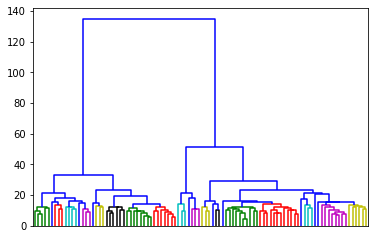

In [75]:
somhcl_all_df = comboCluster(mzdf, genelist_restricted, cth=14)

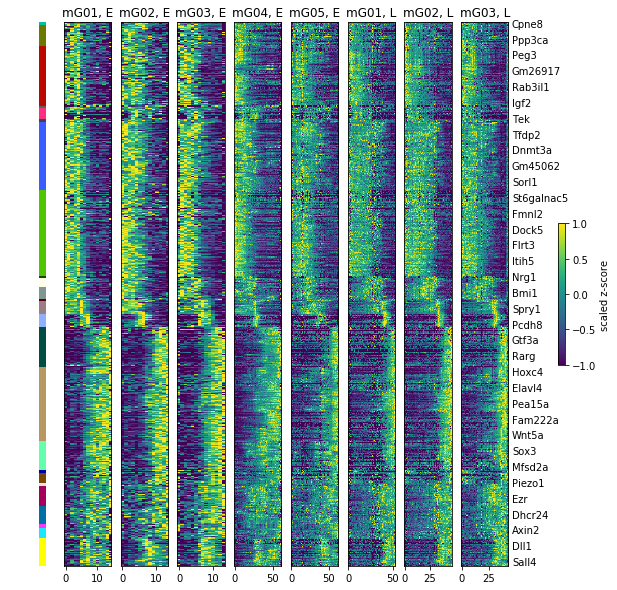

In [76]:
plt.figure(figsize=(10,10))

hcldf = somhcl_all_df
gene_order = hcldf.sort_values(by=['hcl','som']).index
Npl = len(ndfs_E + ndfs_L)+2
plt.subplot(1,Npl,1, frameon = False)

y0 = 0; z0 = 0; xb = 4 # 3
for i in set(hcldf['hcl']):
    y = 1.0*len(hcldf[hcldf['hcl'] == i])/len(hcldf)
    plt.bar([xb], [y], bottom = y0, width = 0.3, color = Colors.colors[i])
    y0 += y       
plt.yticks([]); plt.xticks([])
plt.ylim(0,1)
plt.xlim(2.5,4.5)

for i, df in enumerate(zdfs_E+zdfs_L):
    plt.subplot(1,Npl,i+2)
    plt.imshow(scalezscore(df.loc[gene_order][::-1]), aspect = 'auto')
    plt.yticks([])
    plt.title(', '.join(df.columns[0].rsplit('-')[1:]))
plt.tick_params(axis='y', labelleft=False, labelright=True, length = 0)
plt.yticks(range(len(gene_order)), [g.rsplit('_')[1] if np.mod(i,15)==jidx else '' for i, g in enumerate(gene_order[::-1])])

plt.subplot(1,Npl, Npl, frameon = False)
plt.xticks([]); plt.yticks([])
plt.colorbar(label = 'scaled z-score')

plt.savefig('../results/comparison_Lfng_E14IB10_gastruloids/heatmap_reprELgenes.pdf', bbox_inches = 'tight')
hcldf.sort_values(by=['hcl','som']).to_csv('../results/comparison_Lfng_E14IB10_gastruloids/heatmap_reprELgenes.tsv', sep = '\t')

plt.show()

In [77]:
genepresence = pd.DataFrame(0, columns = ['Lfng', 'E14IB10'], index = set(list(genelist_E)+list(genelist_L)))

In [78]:
for g in genelist_E:
    genepresence.loc[g,'E14IB10'] = 1
for g in genelist_L:
    genepresence.loc[g,'Lfng'] = 1


In [79]:
genepresence.to_csv('../results/comparison_Lfng_E14IB10_gastruloids/list_reproducibleGenes.tsv', sep = '\t')

# difference in expression levels in reproducible genes

In [80]:
nndfs_E = [1e6*df/df.sum() for df in ndfs_E]
nndfs_L = [1e6*df/df.sum() for df in ndfs_L]
nndfs_all = nndfs_E + nndfs_L

nndfs_E = [df.loc[genelist_restricted] for df in nndfs_E]
nndfs_L = [df.loc[genelist_restricted] for df in nndfs_L]
nndfs_all = [df.loc[genelist_restricted] for df in nndfs_all]

In [81]:
dge_df = pd.DataFrame({g: {
    'meanE': np.mean([df.loc[g].sum() for df in nndfs_E]),
    'meanL': np.mean([df.loc[g].sum() for df in nndfs_L])
} for g in genelist_restricted}).T

In [82]:
dge_df['mean'] = dge_df[['meanL','meanE']].mean(axis=1)
dge_df['FC'] = dge_df['meanL']/dge_df['meanE']

In [83]:
dge_df.head()

,meanE,meanL,mean,FC
ENSMUSG00000034845_Plvap,376.140076,900.010652,638.075364,2.392754
ENSMUSG00000031327_Chic1,1829.361824,2414.048237,2121.705030,1.319612
ENSMUSG00000050071_Bex1,6435.235912,6439.457823,6437.346867,1.000656
ENSMUSG00000026833_Olfm1,1351.344795,1256.918874,1304.131835,0.930124
ENSMUSG00000079445_B3gnt7,599.831966,271.602911,435.717438,0.452798


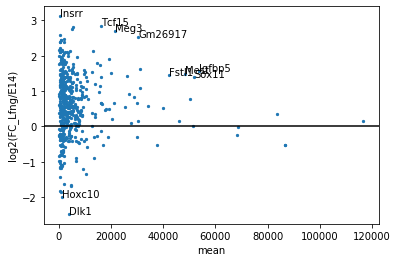

In [84]:
fig, ax = plt.subplots()
ax.scatter(dge_df['mean'], np.log2(dge_df['FC']), s = 5)
ax.axhline(0, c = 'k')

for g in [dge_df[np.log2(dge_df['FC'])>3].index[0]]+list(dge_df[(np.log2(dge_df['FC'])>2.5)&(dge_df['mean']>10000)].index)+list(dge_df[(np.log2(dge_df['FC'])>1.1)&(dge_df['mean']>40000)].index)+list(dge_df[(np.log2(dge_df['FC'])<-2)].index):
    x = dge_df.loc[g,'mean']
    y = np.log2(dge_df.loc[g,'FC'])
    ax.annotate(g.rsplit('_')[-1], (x,  y))

ax.set_ylabel('log2(FC_Lfng/E14)')   
ax.set_xlabel('mean')

plt.savefig('../results/comparison_Lfng_E14IB10_gastruloids/expr_dge_reprELgenes.pdf', bbox_inches = 'tight')
plt.show()

In [85]:
[dge_df[np.log2(dge_df['FC'])>3].index[0]]+list(dge_df[(np.log2(dge_df['FC'])>2.5)&(dge_df['mean']>10000)].index)+list(dge_df[(np.log2(dge_df['FC'])>1.1)&(dge_df['mean']>40000)].index)+list(dge_df[(np.log2(dge_df['FC'])<-2)].index)

['ENSMUSG00000005640_Insrr',
 'ENSMUSG00000068079_Tcf15',
 'ENSMUSG00000097971_Gm26917',
 'ENSMUSG00000021268_Meg3',
 'ENSMUSG00000063632_Sox11',
 'ENSMUSG00000022816_Fstl1',
 'ENSMUSG00000026185_Igfbp5',
 'ENSMUSG00000051855_Mest',
 'ENSMUSG00000040856_Dlk1',
 'ENSMUSG00000022484_Hoxc10']